# Pengenalan plotting

* **Produk yang Digunakan:** 
[ls8_sr](https://explorer.digitalearth.africa/ls8_sr)

* **Prasyarat:** Para pengguna notebook ini telah memahami:
    * Bagaimana menjalankan [Jupyter notebook](01_Jupyter_notebooks.ipynb)
    * Memeriksa ketersediaan [Piksel products and measurements](02_Product_dan_measurement.ipynb)
    * Cara [load data dari Piksel](03_Membuka_data.ipynb)

## Latar Belakang
Visualisasi data merupakan bagian penting dalam pengolahan data Pengamatan Bumi (Earth Observation). Paket Python xarray menyediakan berbagai opsi plotting data yang sederhana, memungkinkan pengguna membuat plot dari dataset multidimensi dengan cepat. Untuk menghasilkan plot yang lebih kompleks dan informatif dari data Piksel, repositori Notebook Piksel menyediakan modul plotting khusus dengan fungsionalitas tambahan yang mudah digunakan.

## Deskripsi
Notebook ini memperkenalkan cara memvisualisasikan data satelit Piksel dari hasil kueri datacube. Notebook ini mencakup metode plotting xarray yang umum digunakan serta fungsi khusus dari deafrica_tools.plotting.

Topik yang dibahas meliputi:

 - Menampilkan area of interest (AOI) sebelum melakukan kueri datacube
 - Melakukan kueri datacube dan memuat data
 - Plotting data satu band (misalnya, satu band satelit)
    - Memilih dan plotting satu langkah waktu (timestep)
    - Plotting beberapa langkah waktu
    - Menyesuaikan tampilan plot
 - Plotting citra tiga band dalam warna asli (true color) atau palsu (false color)
    - Memetakan satu langkah waktu
    - Memetakan beberapa langkah waktu
    - Menyesuaikan tampilan plot


***

## Memulai
Untuk menjalankan pengantar plotting data dari datacube, jalankan semua sel dalam notebook, mulai dari sel "Load packages".
Jika memerlukan bantuan dalam menjalankan sel notebook, silakan merujuk ke [Jupyter Notebooks notebook](01_Jupyter_notebooks.ipynb). 

### Memuat Library
Pertama, jalankan `%matplotlib inline`, untuk memastikan gambar ditampilkan dengan benar di Jupyter Notebook.

Selanjutnya, muat  `datacube` package, untuk mengambil data. 

Untuk memvisualisasikan data, impor fungsi pemetaan dari deafrica_tools.plotting. Dalam notebook ini, kita akan menggunakan `rgb` and `display_map`yang dapat diimpor dalam satu baris dengan memisahkan namanya dengan koma.

In [2]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map

### Menghubungkan ke datacube
Kita kemudian terhubung ke basis data datacube agar dapat memuat data Piksel. 

In [3]:
dc = datacube.Datacube(app="04_Plotting")

### Parameter analisis

Variabel berikut diperlukan untuk menetapkan kueri dalam notebook ini:
- `lat_range`: Rentang garis lintang yang akan dianalisis (misalnya, (-6.005237, -6.025759)). Untuk load waktu yang wajar, sebaiknya tetap dalam rentang ~0.1 derajat atau kurang.
- `lon_range`: Rentang garis bujur yang akan dianalisis (misalnya, (106.596046, 106.632157)). Untuk load waktu yang wajar, sebaiknya tetap dalam rentang ~0.1 derajat atau kurang.
- `time_range`: Rentang tanggal yang akan dianalisis (misalnya, ("2024-07-01", "2024-07-31")).


In [4]:
lat_range = (-6.005237, -6.025759)
lon_range = (106.596046, 106.632157)
time_range = ("2024-07-01", "2024-07-31")

## Menampilkan lokasi
Sebelum menjalankan query serta mengekstrak dan menganalisis data, pastikan lokasi yang dipilih sudah benar.
Fungsi `display_map()` akan menampilkan area yang dipilih sebagai persegi panjang merah pada peta interaktif. Dengan mengklik titik mana pun di peta, kita dapat melihat koordinat garis lintang dan bujur dari titik tersebut.

In [5]:
display_map(x=lon_range, y=lat_range)

/home/ubuntu/miniforge3/envs/cubeenv/lib/python3.12/site-packages/deafrica_tools/plotting.py:284: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  all_longitude, all_latitude = transform(Proj(crs), Proj("EPSG:4326"), all_x, all_y)


## Menampilkan data
Variabel yang telah ditentukan sebelumnya digunakan di sini untuk melakukan kueri pada Piksel datacube menggunakan fungsi `dc.load()`dan memuat data yang diperkenalkan dalam Notebook [Membuka data](03_Membuka_data.ipynb).
Notebook ini menggunakan data Landsat 8 Surface reflectance `ls8_sr`.

In [6]:
ds = dc.load(product="s2_l2a",
             measurements=['blue','green','red','nir','swir16','swir22'],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:32748',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset> Size: 750kB
Dimensions:      (time: 6, y: 77, x: 135)
Coordinates:
  * time         (time) datetime64[ns] 48B 2024-07-02T03:19:47.367000 ... 202...
  * y            (y) float64 616B 9.336e+06 9.336e+06 ... 9.334e+06 9.334e+06
  * x            (x) float64 1kB 6.766e+05 6.767e+05 ... 6.806e+05 6.807e+05
    spatial_ref  int32 4B 32748
Data variables:
    blue         (time, y, x) uint16 125kB 7190 7186 7216 7216 ... 517 487 513
    green        (time, y, x) uint16 125kB 6764 6791 6824 6812 ... 860 838 806
    red          (time, y, x) uint16 125kB 6447 6453 6483 6500 ... 540 480 600
    nir          (time, y, x) uint16 125kB 6518 6544 6522 ... 3043 3655 3368
    swir16       (time, y, x) uint16 125kB 2362 2365 2375 ... 1833 2110 2139
    swir22       (time, y, x) uint16 125kB 2886 2908 2889 2889 ... 932 1084 1195
Attributes:
    crs:           epsg:32748
    grid_mapping:  spatial_ref


## Memplot citra satu band

`xarray`menyediakan metode bawaan untuk memplot variabel atau measurement data secara individual. 
Misalnya, kita dapat membuat plot untuk satu measurement, seperti band satelit `swir_1` dari data yang telah dimuat sebelumnya.

Untuk melakukan ini, pertama-tama kita perlu mengakses band yang diinginkan sebagai `xarray.DataArray` (Untuk memahami perbedaan antara  `xarray.Dataset` dan `xarray.DataArray` silakan merujuk kembali ke [Membuka data](03_Membuka_data.ipynb) notebook:

In [7]:
print(ds.swir16)

<xarray.DataArray 'swir16' (time: 6, y: 77, x: 135)> Size: 125kB
array([[[2362, 2365, 2375, ..., 2574, 2590, 2599],
        [2357, 2367, 2372, ..., 2571, 2583, 2593],
        [2365, 2373, 2381, ..., 2578, 2561, 2575],
        ...,
        [2323, 2330, 2340, ..., 2529, 2543, 2543],
        [2318, 2331, 2344, ..., 2537, 2525, 2549],
        [2312, 2323, 2331, ..., 2525, 2539, 2540]],

       [[2649, 2693, 2700, ..., 2623, 2569, 2616],
        [2677, 2740, 2768, ..., 2621, 2597, 2648],
        [2782, 2748, 2724, ..., 2648, 2732, 2752],
        ...,
        [3777, 3814, 3848, ..., 3426, 3286, 3168],
        [3791, 3858, 3883, ..., 3441, 3304, 3140],
        [3709, 3850, 3864, ..., 3449, 3300, 3116]],

       [[ 225,  226,  232, ..., 1019, 1582, 1576],
        [ 227,  229,  230, ..., 1139, 1498, 1427],
        [ 227,  219,  216, ..., 1467, 1454, 1242],
        ...,
...
        ...,
        [ 244,  241,  238, ..., 1874, 1979, 2174],
        [ 237,  237,  240, ..., 1758, 1844, 2087],
        

### Memilih dan memplot satu timestep.

Kita dapat melihat pada header objek bahwa `xarray.DataArray` ini memiliki data untuk enam timestep (misalnya. `<xarray.DataArray 'swir_1' (time: 6, y: 834, x: 644)>`).
Untuk memplot hanya satu timestep, kita perlu memilihnya menggunakan salah satu opsi berikut:

1. `.isel()`: .isel(): Ini singkatan dari "index selection" (pemilihan indeks) dan memungkinkan kita dengan mudah memilih timestep tertentu dari sebuah dataset dengan memberikan nomor observasi yang diinginkan. Dalam Python, perhitungan dimulai dari 0, jadi untuk memilih timestep pertama dalam xarray.DataArray, kita bisa menggunakan .isel(time=0).

In [8]:
first_timestep = ds.swir16.isel(time=0)

print(first_timestep)

<xarray.DataArray 'swir16' (y: 77, x: 135)> Size: 21kB
array([[2362, 2365, 2375, ..., 2574, 2590, 2599],
       [2357, 2367, 2372, ..., 2571, 2583, 2593],
       [2365, 2373, 2381, ..., 2578, 2561, 2575],
       ...,
       [2323, 2330, 2340, ..., 2529, 2543, 2543],
       [2318, 2331, 2344, ..., 2537, 2525, 2549],
       [2312, 2323, 2331, ..., 2525, 2539, 2540]], dtype=uint16)
Coordinates:
    time         datetime64[ns] 8B 2024-07-02T03:19:47.367000
  * y            (y) float64 616B 9.336e+06 9.336e+06 ... 9.334e+06 9.334e+06
  * x            (x) float64 1kB 6.766e+05 6.767e+05 ... 6.806e+05 6.807e+05
    spatial_ref  int32 4B 32748
Attributes:
    units:         1
    nodata:        0
    crs:           epsg:32748
    grid_mapping:  spatial_ref


2. `.sel()`: Metode ini memungkinkan kita memilih data berdasarkan label koordinat dunia nyata, seperti `waktu`. Misalnya, dari bagian Koordinat, kita dapat memilih timestep pertama (yaitu, observasi pada 2 Juli 2024) dalam `xarray.DataArray` dengan menggunakan `.sel(time='2024-07-02')`.

In [9]:
print(ds.time)

<xarray.DataArray 'time' (time: 6)> Size: 48B
array(['2024-07-02T03:19:47.367000000', '2024-07-07T03:19:47.030000000',
       '2024-07-12T03:19:45.455000000', '2024-07-17T03:19:44.619000000',
       '2024-07-22T03:19:46.942000000', '2024-07-27T03:19:46.102000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 48B 2024-07-02T03:19:47.367000 ... 202...
    spatial_ref  int32 4B 32748
Attributes:
    units:    seconds since 1970-01-01 00:00:00


In [10]:
first_timestep = ds.swir16.sel(time='2024-07-02')

print(first_timestep)

<xarray.DataArray 'swir16' (time: 1, y: 77, x: 135)> Size: 21kB
array([[[2362, 2365, 2375, ..., 2574, 2590, 2599],
        [2357, 2367, 2372, ..., 2571, 2583, 2593],
        [2365, 2373, 2381, ..., 2578, 2561, 2575],
        ...,
        [2323, 2330, 2340, ..., 2529, 2543, 2543],
        [2318, 2331, 2344, ..., 2537, 2525, 2549],
        [2312, 2323, 2331, ..., 2525, 2539, 2540]]], dtype=uint16)
Coordinates:
  * time         (time) datetime64[ns] 8B 2024-07-02T03:19:47.367000
  * y            (y) float64 616B 9.336e+06 9.336e+06 ... 9.334e+06 9.334e+06
  * x            (x) float64 1kB 6.766e+05 6.767e+05 ... 6.806e+05 6.807e+05
    spatial_ref  int32 4B 32748
Attributes:
    units:         1
    nodata:        0
    crs:           epsg:32748
    grid_mapping:  spatial_ref


Sekarang kita dapat menggunakan metode .plot() untuk memvisualisasikan data swir1 pada timestep yang telah kita pilih:

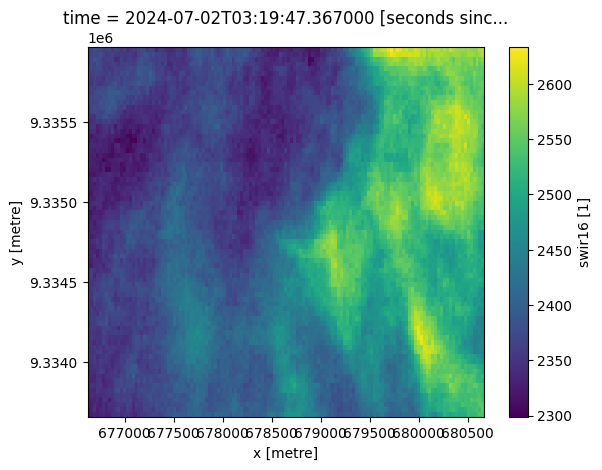

In [11]:
first_timestep.plot()

### Plotting Beberapa Timestep
Sering kali, berguna untuk membuat plot dari satu variabel pengukuran sepanjang waktu, misalnya untuk membandingkan perubahan antara observasi satelit atau summary dataset.
Untuk memplot beberapa citra sekaligus, kita dapat melewati langkah .isel() dan langsung memplot seluruh xarray.DataArray.
Agar setiap timestep ditampilkan dalam kolom terpisah dalam satu figur, kita dapat menggunakan:

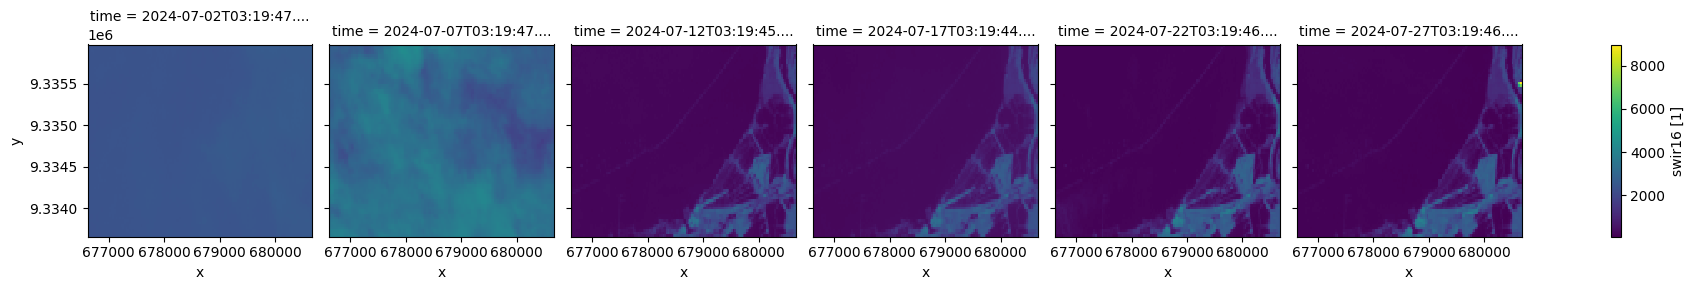

In [12]:
ds.swir16.plot(col="time")

> **Catatan**: Jenis plotting ini disebut "facetted plotting". Untuk informasi lebih lanjut, silahkan  merujuk ke [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

### Kustomisasi tampilan plot
Anda mungkin menyadari bahwa plot di atas tampak gelap dan sulit dilihat dengan jelas. Untuk meningkatkan tampilan plot di xarray, kita dapat menggunakan argumen robust=True, yang akan mengoptimalkan warna dengan memangkas nilai ekstrem atau outlier.
Dengan menggunakan robust=True, batas warna akan dihitung berdasarkan persentil ke-2 dan ke-98 dari data, sehingga hasil visualisasi lebih jelas dan informatif.

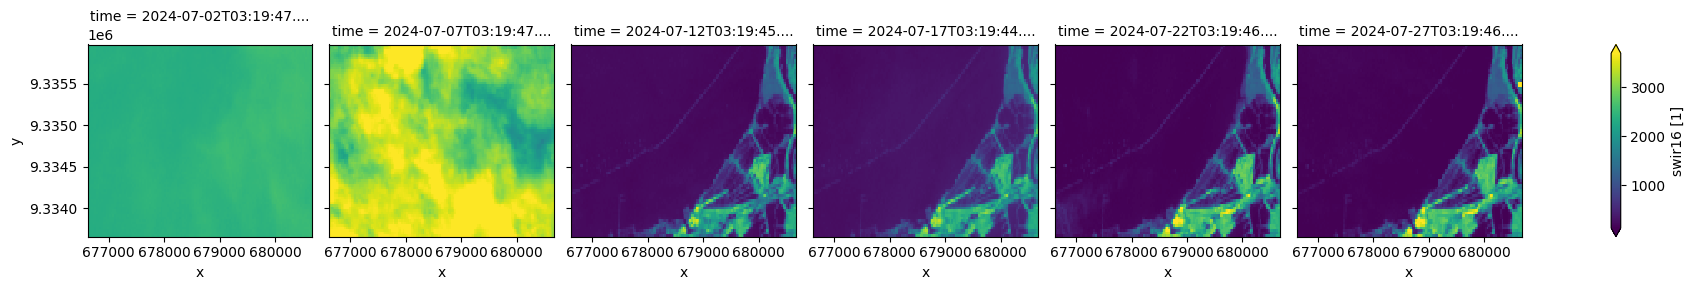

In [13]:
ds.swir16.plot(col="time", robust=True)

Saat memilih peta berwarna untuk sebuah plot, penting untuk menggunakan skema warna yang dapat dipahami secara logis oleh mata manusia. Peta berwarna terbaik adalah yang "perceptually uniform", yaitu peta berwarna yang berubah secara bertahap dari gelap ke terang, di mana setiap perubahan tingkat kecerahan sesuai dengan perubahan nilai data.
Beberapa contoh peta berwarna perceptually uniform yang direkomendasikan meliputi:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> **Catatan**: Untuk membaca lebih lanjut tentang peta berwarna perceptually uniform dalam visualisasi data silahkan merujuk ke, [matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

Penting juga untuk mempertimbangkan pengguna yang buta warna saat memilih peta berwarna.
xarray mendukung banyak peta berwarna dari kelompok [colorbrewer](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3), yang telah dioptimalkan agar ramah bagi individu dengan buta warna.
Anda dapat menggunakan alat interaktif online untuk menjelajahi semua peta berwarna yang tersedia atau memilih salah satu dari opsi umum berikut:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

Untuk daftar lengkap peta berwarna yang tersedia, Anda dapat merujuk ke [daftar ini](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

Sebagai contoh, untuk memvisualisasikan data menggunakan peta berwarna perceptually uniform magma, kita dapat menggunakan:


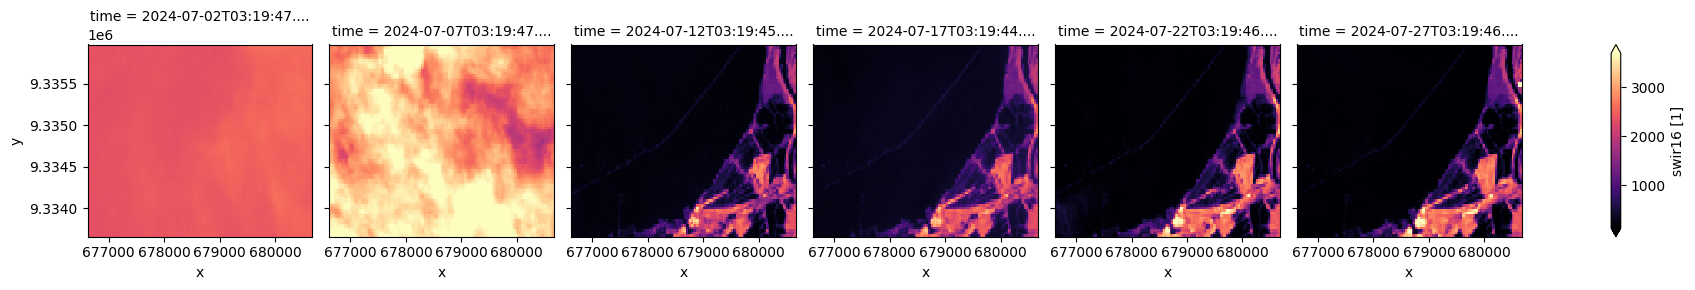

In [14]:
ds.swir16.plot(col="time", robust=True, cmap="magma")

## Plotting Citra RGB True Color atau False Color

Meskipun xarray memudahkan pemetaan citra satu band, memvisualisasikan citra tiga band seperti foto berwarna tidak semudah itu.

Untuk menyederhanakan proses ini, repositori deafrica-sandbox-notebooks menyediakan fungsi kustom rgb(), yang dirancang khusus untuk menampilkan citra tiga band.
Fungsi rgb() memetakan tiga variabel data atau pengukuran dari dataset yang dimuat ke dalam saluran merah (Red), hijau (Green), dan biru (Blue) untuk menghasilkan citra warna.

•	Jika kita menggunakan band merah, hijau, dan biru, hasilnya adalah citra warna alami (true color), seperti yang terlihat oleh mata manusia.
•	Jika kita menggunakan band lain, seperti NIR, merah, dan hijau, hasilnya adalah citra warna semu (false color), yang sering digunakan dalam analisis satelit.
. Anda dapat belajar lebih lanjut tentang pewarnaan citra  [di sini](https://en.wikipedia.org/wiki/False_color#True_color).

Oleh karena itu, fungsi rgb() dapat digunakan untuk memvisualisasikan data yang diperoleh dari sebuah query. Fungsi ini memerlukan input minimal sebagai berikut:

* `ds:` Objek xarray.Dataset yang berisi data citra.Dataset` object
* `bands:`Tiga band yang akan ditampilkan (harus ada dalam dataset)
* `index:` Langkah waktu yang akan ditampilkan (default = 0)

### Ploting Satu timestep

Dimensi waktu dalam xarray.Dataset menunjukkan jumlah timesteps yang tersedia untuk lokasi tertentu selama periode yang dipilih.
Dalam fungsi rgb(), variabel index menentukan timestep yang ingin ditampilkan, mirip dengan penggunaan .isel() sebelumnya.
Perlu diperhatikan: Perhitungan indeks dalam Python dimulai dari 0 sehingga untuk menampilkan timestep pertama `index=0` gunakan:

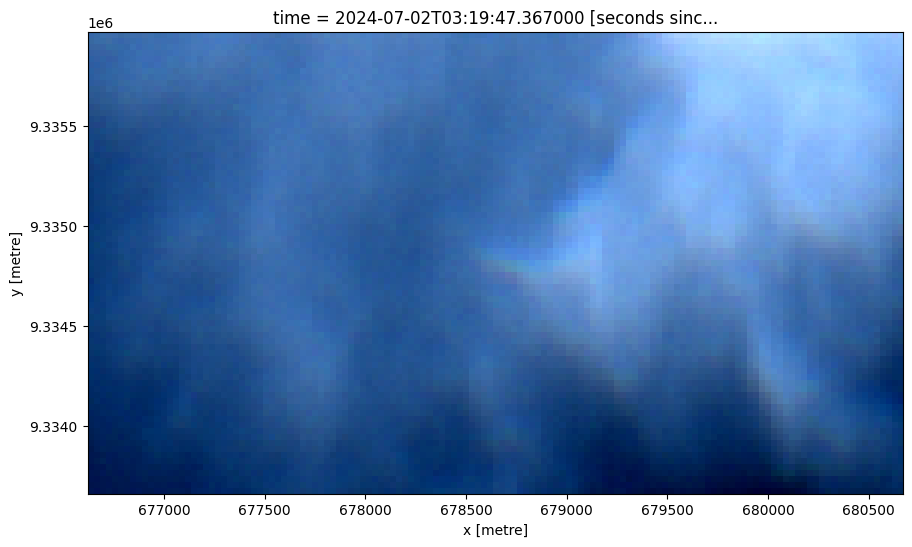

In [15]:
# View a red, green, blue (true colour) image of the first timestep
rgb(ds, bands=["red", "green", "blue"], index=0)

Dengan mengubah input band, kita dapat memvisualisasikan citra false color, yang dapat memberikan pandangan berbeda tentang suatu lanskap.

Kombinasi band (swir_1, nir, green) ini menekankan:

Vegetasi yang sedang tumbuh dalam warna hijau,
Badan air dalam warna biru gelap.

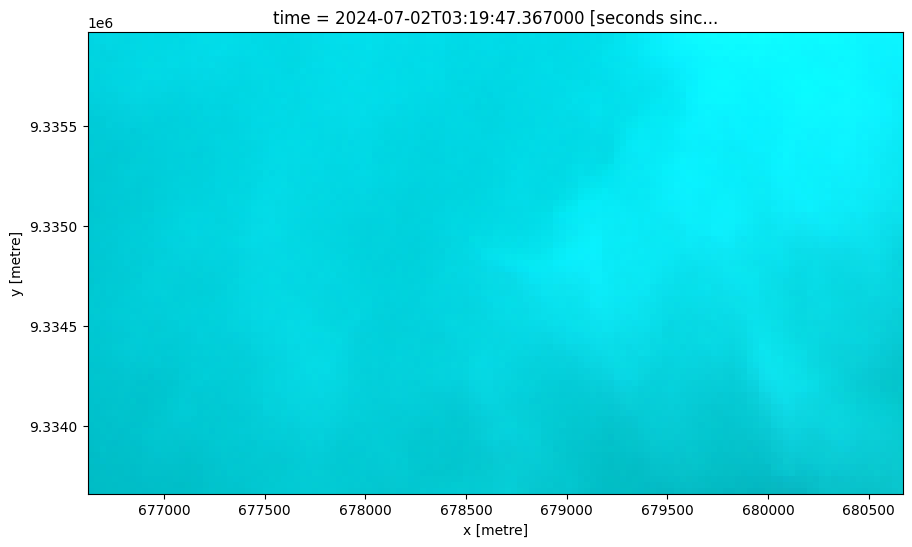

In [16]:
# View a swir_1, nir, green (false colour) image of the first timestep
rgb(ds, bands=['swir16', 'nir', 'green'], index=0)

### Memplotting beberapa timestep
Seperti yang telah dibahas dalam contoh citra satu band di atas, memplotting beberapa timestep dalam satu plot dapat berguna (misalnya, untuk membandingkan perubahan dari waktu ke waktu).
Fungsi rgb() memungkinkan kita melakukan ini dengan memberikan daftar beberapa citra yang akan diplot menggunakan index=[X, X, ...].
Sebagai contoh, kita dapat menampilkan citra pertama dan kelima dalam dataset dengan menggunakan index=[0, 4] (ingat bahwa dalam Python, perhitungan indeks dimulai dari 0):

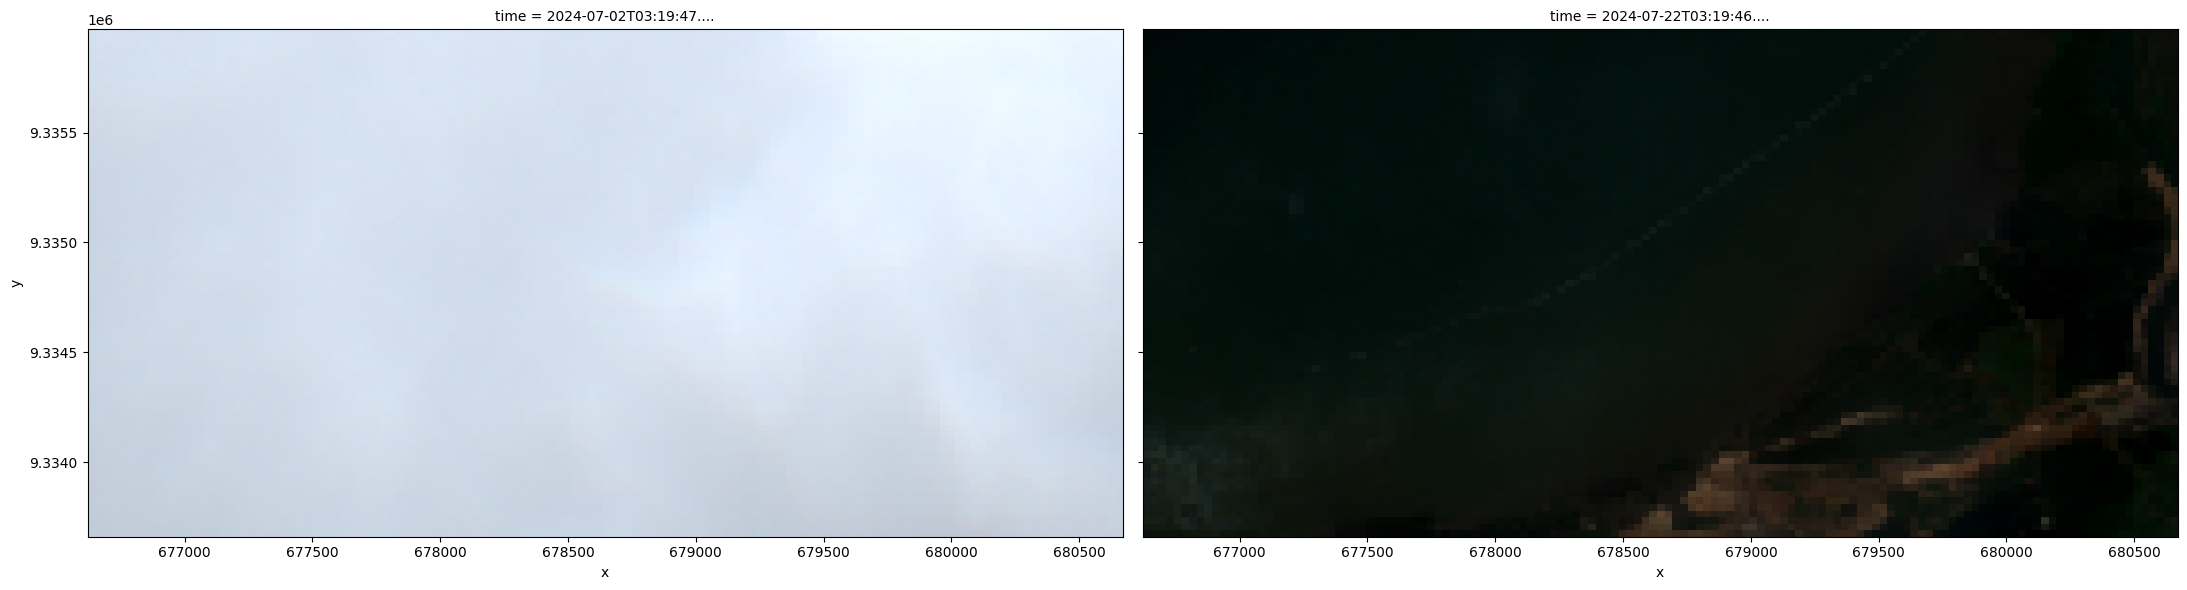

In [17]:
# View a true colour image for the first and fith timesteps
rgb(ds, bands=['red', 'green', 'blue'], index=[0, 4])

Kita juga dapat menggunakan fungsi rgb() untuk memplot seluruh timestep dalam dataset dengan menggunakan sintaks col="time", seperti yang telah ditunjukkan dalam [contoh single band sebelumnya](#Plotting-multiple-timesteps): 

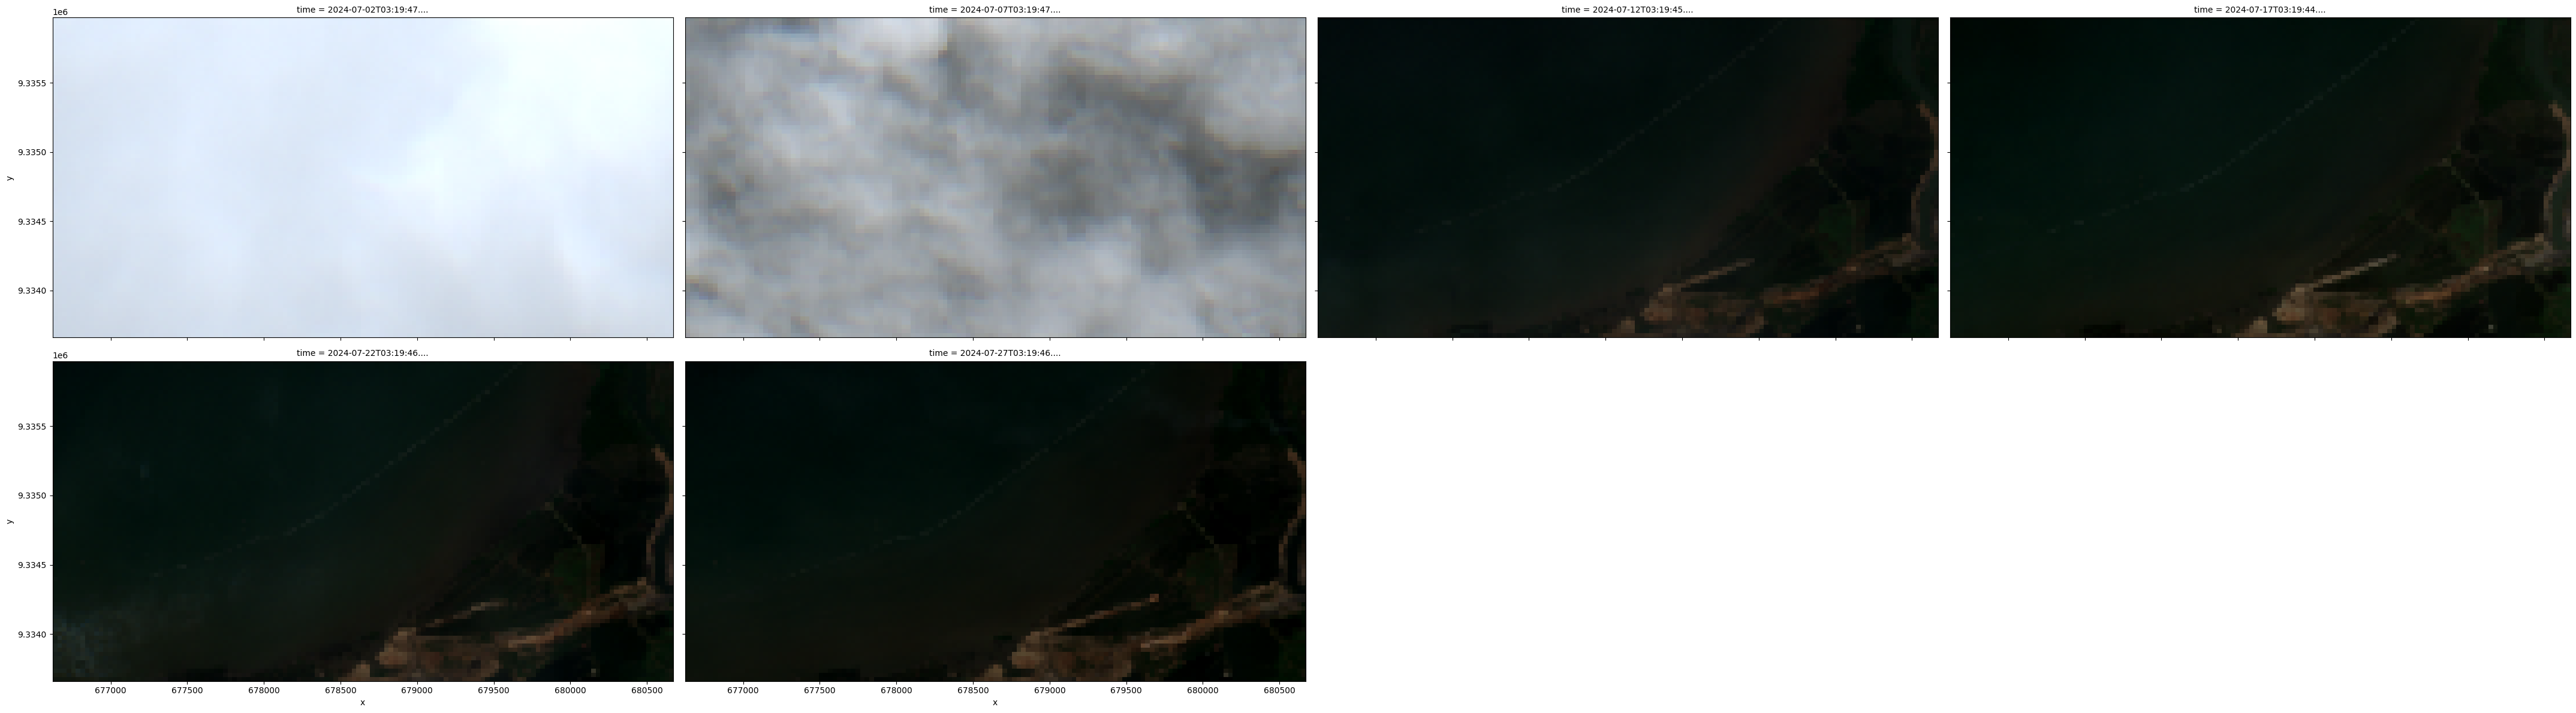

In [19]:
# Plot all timesteps in the dataset
rgb(ds, bands=['red', 'green', 'blue'], col="time")

### Kustomisasi tampilan plot
Secara default, fungsi rgb() menghasilkan plot dengan robust=True untuk meningkatkan tampilan citra dengan memangkas 2% piksel tergelap dan tercerah, menggunakan persentil ke-2 dan ke-98 dari data untuk menentukan batas warna.

Jika hasil default ini kurang optimal, rentang warna pada plot dapat dikustomisasi menggunakan parameter percentile_stretch. Parameter ini memungkinkan kita memangkas nilai minimum dan maksimum yang paling ekstrem dalam dataset, sehingga meningkatkan kontras dan tampilan plot.

Sebagai contoh, dengan menetapkan percentile_stretch=[0.05, 0.95], kita akan memangkas 5% piksel tergelap dan tercerah, sehingga rentang warna akan lebih fokus pada 90% nilai yang kurang ekstrem:

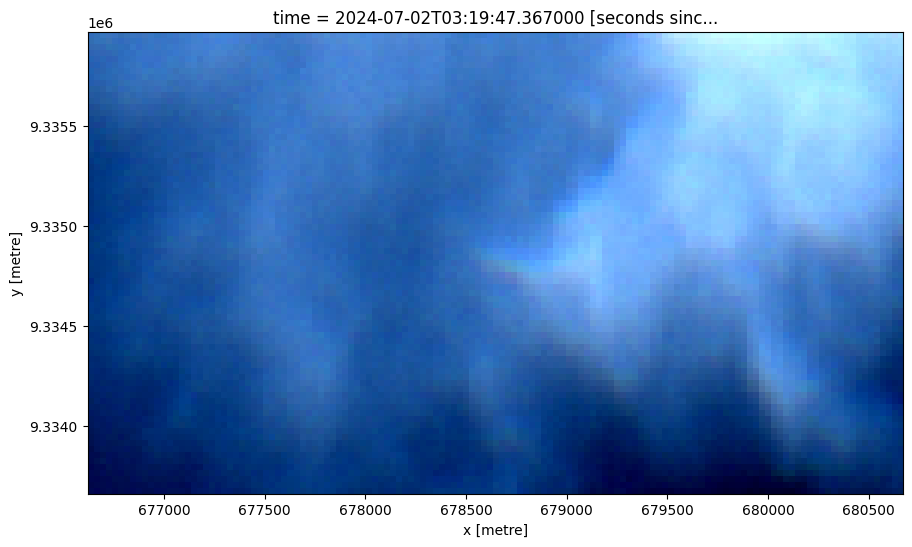

In [20]:
rgb(ds, 
    bands=['red', 'green', 'blue'], 
    index=0, 
    percentile_stretch=[0.05, 0.95])


## Langkah selanjutnya 

Informasi lebih lanjut tentang penggunaan Jupyter Notebooks atau JupyterLab, anda dapat menelurusi [JupyterLab documentation page](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html).

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:
Untuk mempelajari lebih lanjut panduan pengguna bagi para pemula ini, silahkan pelajari notebook berikut secara berurutan:


1. [Jupyter Notebooks](http://43.218.254.133:8888/notebooks/panduan-pengguna/01_Jupyter_notebooks.ipynb)
2. [Produk dan Pengukuran](http://43.218.254.133:8888/notebooks/panduan-pengguna/02_Product_dan_measurement.ipynb)
3. [Membuka Data](http://43.218.254.133:8888/notebooks/panduan-pengguna/03_Membuka_data.ipynb)
4. **Plotting (this notebook)**
5. [Analisis Dasar](http://43.218.254.133:8888/notebooks/panduan-pengguna/05_Analisis_dasar.ipynb)
6. [Pengenalan ke numpy](http://43.218.254.133:8888/notebooks/panduan-pengguna/06_numpy.ipynb)
7. [Pengenalan ke xarray](http://43.218.254.133:8888/notebooks/panduan-pengguna/07_xarray.ipynb)
8. [Pemrosesan Paralel dengan Dask](http://43.218.254.133:8888/notebooks/panduan-pengguna/08_Parallel_processing_dgn_dask.ipynb)

Once you have you have completed the above tutorials, join advanced users in exploring:

* The "Datasets" directory in the repository, where you can explore DE Africa products in depth.
* The "Frequently used code" directory, which contains a recipe book of common techniques and methods for analysing DE Africa data.
* The "Real-world examples" directory, which provides more complex workflows and analysis case studies.

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [49]:
print(datacube.__version__)

1.8.19


**Last Tested:**

In [50]:
from datetime import date
print(date.today())

2025-02-10
